In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from openTSNE import TSNE
import umap

# 改成自己的路徑
df_origin = pd.read_csv('C:\\school\\SchoolProgram\\NTUST_CSIE_DS\\DataSet\\preprocessingV2_T1_2_3.csv')

#shape
print("Original Data Shape:", df_origin.shape)

PCA 降維

In [3]:
# 標準化
scaler = StandardScaler()

#auto drop non-numeric, nan columns
df_numeric = df_origin.select_dtypes(include=[np.number]).dropna(axis=1)
X_scaled = scaler.fit_transform(df_numeric.drop(columns=['label']))

# PCA降維
pca = PCA(n_components=8, random_state=42)
pca_result = pca.fit_transform(X_scaled)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.19222538 0.11722713 0.08713855 0.06795088 0.05281198 0.04292596
 0.0407867  0.0349456 ]
PCA方差值: [5.95900458 3.63405192 2.70130321 2.10648366 1.6371764  1.33070876
 1.26439142 1.08331675]


視覺化PCA

In [ ]:


#version1: plot all points
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], s=5, alpha=0.5, c='blue')
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(False)
plt.legend()
plt.show()

#version2: only plot label = 1
mask = df_numeric['label'] == 1

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[mask, 0], pca_result[mask, 1], s=5, alpha=0.5, c='red', label='Label 1')
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(False)
plt.legend()
plt.show()

T-SNE

In [ ]:
#1% smaple of data for t-SNE
np.random.seed(42)
sample_indices = np.random.choice(np.where(df_numeric['label'] == 0)[0], size=int(0.02 * np.sum(df_numeric['label'] == 0)), replace=False)
label_1_indices = np.where(df_numeric['label'] == 1)[0]

combined_indices = np.concatenate((sample_indices, label_1_indices))
pca_sample = pca_result[combined_indices]
label_sample = df_numeric['label'].to_numpy()[combined_indices]

tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
)
train_reduced = tsne.fit(pca_sample)

# version1: plot all points with legend
colors_sample = ['red' if l == 1 else 'blue' for l in label_sample]
plt.figure(figsize=(10, 6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], s=1, alpha=0.6, c=colors_sample)
plt.title('t-SNE Result')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(False)

# Add legend
for label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter([], [], c=color, label=f'Label {label}')
plt.legend(title="Labels", loc='upper right', markerscale=1, fontsize='small')

plt.show()


UMP

In [ ]:
# 1% sample of label=0 data
np.random.seed(42)
sample_indices = np.random.choice(np.where(df_numeric['label'] == 0)[0], size=int(0.5 * np.sum(df_numeric['label'] == 0)), replace=False)
X_sample_0 = X_scaled[sample_indices]
label_sample_0 = df_numeric['label'].to_numpy()[sample_indices]

# All label=1 data
X_sample_1 = X_scaled[df_numeric['label'] == 1]
label_sample_1 = df_numeric['label'][df_numeric['label'] == 1].to_numpy()

# Combine label=0 sample and all label=1 data
X_combined = np.vstack((X_sample_0, X_sample_1))
label_combined = np.concatenate((label_sample_0, label_sample_1))

# UMAP transformation
reducer = umap.UMAP(n_components=6, n_neighbors=10, random_state=42)
X_umap = reducer.fit_transform(X_combined)

# Plot (3D)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
colors_combined = [(1.0, 0.0, 0.0, 1) if l == 1 else (0.0, 0.0, 1.0, 0.4) for l in label_combined]
ax.scatter(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], s=1, c=colors_combined)  # Reduced dot size
ax.set_title("UMAP (3D)")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.set_zlabel("UMAP 3")
plt.show()

c:\Users\0978w\.conda\envs\ntust_ds\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


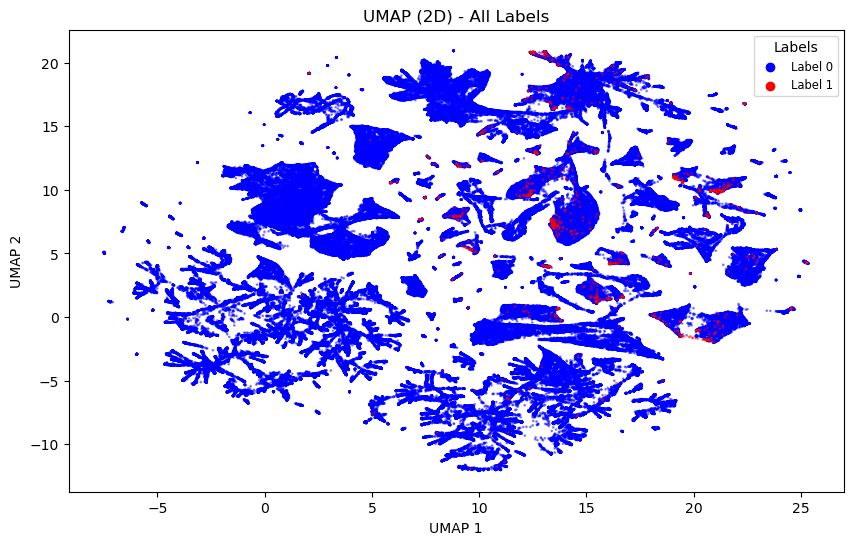

In [7]:
# 1% sample of label=0 data
np.random.seed(42)
sample_indices = np.random.choice(np.where(df_numeric['label'] == 0)[0], size=int(np.sum(df_numeric['label'] == 0)), replace=False)
X_sample_0 = X_scaled[sample_indices]
label_sample_0 = df_numeric['label'].to_numpy()[sample_indices]

# All label=1 data
X_sample_1 = X_scaled[df_numeric['label'] == 1]
label_sample_1 = df_numeric['label'][df_numeric['label'] == 1].to_numpy()

# Combine label=0 sample and all label=1 data
X_combined = np.vstack((X_sample_0, X_sample_1))
label_combined = np.concatenate((label_sample_0, label_sample_1))

# UMAP transformation to 2D
reducer = umap.UMAP(n_components=2, n_neighbors=15, random_state=42)
X_umap_2d = reducer.fit_transform(X_combined)


plt.figure(figsize=(10, 6))
colors_combined = ['red' if l == 1 else 'blue' for l in label_combined]
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], s=1, alpha=0.4, c=colors_combined)
plt.title("UMAP (2D) - All Labels")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(False)
# Add legend
for label, color in zip([0, 1], ['blue', 'red']):
    plt.scatter([], [], c=color, label=f'Label {label}')
plt.legend(title="Labels", loc='upper right', markerscale=1, fontsize='small')
plt.show()


KMeans++ 分群（UMAP 2D，7 群）

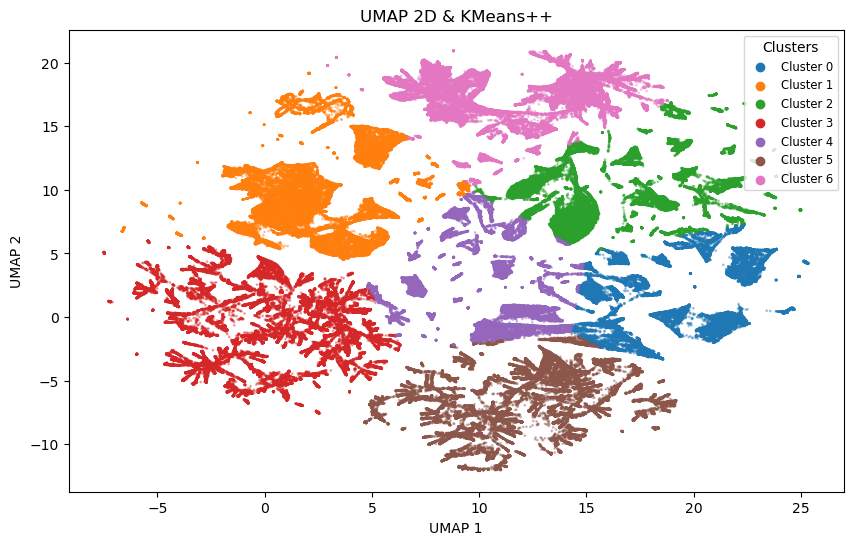

Cluster 0: Color (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), Number of points: 37019
Cluster 1: Color (1.0, 0.4980392156862745, 0.054901960784313725), Number of points: 58179
Cluster 2: Color (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), Number of points: 51727
Cluster 3: Color (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), Number of points: 51011
Cluster 4: Color (0.5803921568627451, 0.403921568627451, 0.7411764705882353), Number of points: 38059
Cluster 5: Color (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), Number of points: 44407
Cluster 6: Color (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), Number of points: 53366


In [12]:
from sklearn.cluster import KMeans

# 使用 UMAP 3D 結果分群（需先執行產生 X_umap 的 Cell）
kmeans = KMeans(n_clusters=7, init='k-means++', n_init='auto')
clusters = kmeans.fit_predict(X_umap_2d)

# 視覺化分群結果 (2D)
plt.figure(figsize=(10, 6))

# Assign colors based on clusters
colors = sns.color_palette('tab10', n_colors=9)
cluster_colors = [colors[cluster] for cluster in clusters]

# Plot the 2D scatter
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=cluster_colors[:X_umap_2d.shape[0]], s=1, alpha=0.35)

# Add legend for cluster colors
unique = np.unique(clusters)  # Ensure unique is defined
for cluster_idx in unique:
    plt.scatter([], [], c=[colors[cluster_idx]], label=f'Cluster {cluster_idx}')
plt.legend(title="Clusters", loc='upper right', markerscale=1, fontsize='small')

# Set titles and labels
plt.title('UMAP 2D & KMeans++')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(False)

plt.show()

#print each cluster color, index and number of points
unique, counts = np.unique(clusters, return_counts=True)
for u, c in zip(unique, counts):
    print(f'Cluster {u}: Color {colors[u]}, Number of points: {c}')

# 選擇性：分群品質評估
# from sklearn.metrics import silhouette_score
# print('Silhouette score:', silhouette_score(X_umap, clusters))

In [13]:
# add clusrter label to orignal dataframe
df_origin['cluster'] = -1  # Initialize with -1 for all rows
df_origin.loc[df_origin.index[:len(clusters)], 'cluster'] = clusters
